# Bag of Words
### Human Science Lab Monsoon 2023

What and why BOW?

===========

### Step 0: Setup
- Python

`python3 --version`

`sudo apt-get install python3`

`pip3 --version`

`sudo apt-get install python3-pip`

 - jupyter notebook vscode extension

- Install and Load python libraries

`pip3 install nltk`

In [1]:
import re
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

Open the text file to be read and load into a variable

In [2]:
filename = "census1931.txt"
infile = open(filename,'r',encoding='utf-8')
text = infile.read()
infile.close()

In [3]:
print(text[:100])

3K

Census of India, 1931

VoL. I India
Part 1

— Report
by

J.

H.

HUTTON, C.I.E., D.Sc., f.a.s.b


### Removing punctuation marks and other special characters using regex

In [4]:
unrefinedStr = re.sub(r'\—|\'|\`|\"|\||\.|\*|\[|\{|\}|\(|\)|\]|\;|\:|\,|\^|\=|\-|\+|\_|\!|\?|\/|\>|\<|\&|\\|\#|\n', r' ', text) # removing special characters

In [5]:
print(unrefinedStr)

3K  Census of India  1931  VoL  I India Part 1    Report by  J   H   HUTTON  C I E   D Sc   f a s b    Corresponding Member of the Anthropologische Gesellschaft of Vienna  j 3    i     C S g  1S     i  ACTUARIAL REPORT by  L  S  Vaidyanathan  F  I  A   DELHI  MANAGER OF PUBLICATIONS 1933  GOVERNMENT OF INDIA ARCHEOLOGICAL SURVEY OF INDIA  ARCHEOLOGICAL LIBRARY ACCESSION NO  S f  CALL No  3   2 D G A  79     0pS4lc J Cil      yRefY   r              Government of India Publications are obtainable from the Manager of Publications  Civil Lines  Old Delhi  and from the following Agents    EUEOPE  Office of the HIGH COMMISSIONEE FOR INDIA  India House  Aldwych  LONDON  W  C  2  And at all Booksellers   INDIA AND CEYLON     Provincial Book Depots     Superintendent  Government Press  Mount Road  Madras  BoJdiAY   Superintendent  Government Printing and Stationery  Queen’s Road  Bombay  Sind   Library attached the of the Commissioner in Sind  Karachi  Bengal  Bengal Secretariat Book Depot 

### Tokenization: Splitting the string into words and storing into a list (array)

In [6]:
tokens = unrefinedStr.split()

In [7]:
print(len(tokens))
# Print the first 20 tokens
print(tokens[:20]) 
#the above statement is equivalent to print(tokens[0:20:1]) which is basically for (int i=0;i<20;i++) in C++

387834
['3K', 'Census', 'of', 'India', '1931', 'VoL', 'I', 'India', 'Part', '1', 'Report', 'by', 'J', 'H', 'HUTTON', 'C', 'I', 'E', 'D', 'Sc']


### Changing word case

In [8]:
tokens = [myWord.lower() for myWord in tokens]

# The above statement is the 'pythonic way' of writing code and is equivalent to:
# for (int i=0; i<len(tokens); i++)
#     tokens[i] = to_lowerr(tokens[i])

In [9]:
print(tokens[:20])

['3k', 'census', 'of', 'india', '1931', 'vol', 'i', 'india', 'part', '1', 'report', 'by', 'j', 'h', 'hutton', 'c', 'i', 'e', 'd', 'sc']


### Stop Words removal

In [10]:
# One time download if you get an error

# import nltk
# nltk.download('stopwords')

In [11]:
myStopWords = set(stopwords.words("english"))
print(len(myStopWords))
print(myStopWords)

179
{'nor', 'a', 'do', 'where', 'can', 'be', 'by', "that'll", 'don', 'd', 've', 'over', 'before', 'she', "isn't", 'an', 'didn', 'm', 'yourself', 'my', 'both', "haven't", 'then', "hadn't", 'than', 'doesn', 'myself', 'your', 'while', 'wouldn', 'her', 'which', 'other', "wouldn't", 'some', 'haven', 'have', 'should', 'am', 'ain', 'being', 'so', "shan't", 'were', 'who', 'until', 'here', 'these', 'just', 'during', 'o', "wasn't", 'there', 'down', 'we', "don't", "mustn't", 'wasn', "weren't", 'yours', 'on', 'their', 'that', 'doing', 'its', 'same', "she's", 'will', 'for', 'under', 'hasn', "hasn't", 'through', 'such', 'no', 'themselves', "you'd", 'this', 'his', 'whom', 'i', 'about', 'few', "mightn't", 't', 'has', 'you', "you've", 'won', 'couldn', 'it', 'been', 'what', 'the', 'after', "you'll", 'not', 'again', 'hers', 'hadn', 'mustn', 'he', 'is', 'into', 'me', 'most', 'in', "you're", 'any', "aren't", 'yourselves', 'further', "doesn't", 'did', 'against', 'weren', 'own', "shouldn't", 'needn', 'off', 

Add on to the list of Stopwords with your own custom stopwords

In [17]:
customStop = ["number","per", "return","year", "rate", "vol"]

# This following line appends our new set of stop words to our set of stopwords myStopWords
myStopWords.update(customStop)

In [18]:
print(len(myStopWords))
print(myStopWords)

185
{'nor', 'a', 'do', 'where', 'can', 'be', 'by', "that'll", 'don', 'd', 've', 'over', 'before', 'she', "isn't", 'an', 'didn', 'm', 'yourself', 'my', 'both', "haven't", 'then', "hadn't", 'than', 'doesn', 'myself', 'your', 'while', 'wouldn', 'her', 'which', 'other', "wouldn't", 'some', 'haven', 'have', 'should', 'am', 'ain', 'being', 'so', "shan't", 'were', 'who', 'until', 'here', 'these', 'just', 'during', 'o', "wasn't", 'there', 'down', 'we', "don't", "mustn't", 'wasn', "weren't", 'yours', 'on', 'their', 'that', 'doing', 'its', 'same', "she's", 'will', 'for', 'under', 'hasn', "hasn't", 'through', 'such', 'no', 'themselves', "you'd", 'this', 'his', 'whom', 'i', 'about', 'few', "mightn't", 'per', 't', 'has', 'you', "you've", 'won', 'couldn', 'it', 'been', 'what', 'the', 'after', "you'll", 'not', 'again', 'hers', 'hadn', 'mustn', 'he', 'is', 'into', 'me', 'most', 'in', "you're", 'any', "aren't", 'yourselves', 'further', "doesn't", 'did', 'against', 'weren', 'own', "shouldn't", 'needn', 

In [19]:
Bag = []

# recall: "for word in tokens" does just as what is sounds in simple English. it goes through the array(list in python) and accesses word by word

for word in tokens:
    if word not in myStopWords and len(word)>2 and  word.isnumeric()==False:
        Bag.append(word)

In [20]:
print(len(Bag))

143147


In [21]:
print(Bag[:20])

['census', 'india', 'india', 'part', 'report', 'hutton', 'corresponding', 'member', 'anthropologische', 'gesellschaft', 'vienna', 'actuarial', 'report', 'vaidyanathan', 'delhi', 'manager', 'publications', 'government', 'india', 'archeological']


### Stemming
Stemming vs Lemmatisation

In [22]:
SnowStem = SnowballStemmer('english')
Lemmatiser = WordNetLemmatizer()

In [23]:
# One time download if error

# import nltk
# nltk.download('wordnet')

In [24]:
StemBag = []
LemBag = []
for word in Bag:
    StemBag.append(SnowStem.stem(word))
    LemBag.append(Lemmatiser.lemmatize(word))

In [25]:
print(Bag[:20])
print(StemBag[:20])
print(LemBag[:20])

['census', 'india', 'india', 'part', 'report', 'hutton', 'corresponding', 'member', 'anthropologische', 'gesellschaft', 'vienna', 'actuarial', 'report', 'vaidyanathan', 'delhi', 'manager', 'publications', 'government', 'india', 'archeological']
['census', 'india', 'india', 'part', 'report', 'hutton', 'correspond', 'member', 'anthropologisch', 'gesellschaft', 'vienna', 'actuari', 'report', 'vaidyanathan', 'delhi', 'manag', 'public', 'govern', 'india', 'archeolog']
['census', 'india', 'india', 'part', 'report', 'hutton', 'corresponding', 'member', 'anthropologische', 'gesellschaft', 'vienna', 'actuarial', 'report', 'vaidyanathan', 'delhi', 'manager', 'publication', 'government', 'india', 'archeological']


In [26]:
MyDict = {}
for word in StemBag:
    if word in MyDict.keys():
        MyDict[word] += 1
    else:
        MyDict[word] = 1

In [27]:
print(MyDict.items())

dict_items([('census', 1085), ('india', 1251), ('part', 336), ('report', 311), ('hutton', 12), ('correspond', 100), ('member', 70), ('anthropologisch', 1), ('gesellschaft', 1), ('vienna', 2), ('actuari', 82), ('vaidyanathan', 6), ('delhi', 135), ('manag', 29), ('public', 117), ('govern', 126), ('archeolog', 2), ('survey', 46), ('librari', 4), ('access', 7), ('call', 122), ('0ps4lc', 1), ('cil', 1), ('yrefi', 1), ('obtain', 171), ('civil', 109), ('line', 51), ('old', 78), ('follow', 210), ('agent', 21), ('eueop', 1), ('offic', 90), ('high', 191), ('commissione', 1), ('hous', 158), ('aldwych', 1), ('london', 7), ('booksel', 6), ('ceylon', 33), ('provinci', 102), ('book', 55), ('depot', 17), ('superintend', 164), ('press', 27), ('mount', 4), ('road', 71), ('madra', 407), ('bojdiay', 1), ('print', 20), ('stationeri', 8), ('queen', 2), ('bombay', 292), ('sind', 35), ('attach', 45), ('commission', 65), ('karachi', 16), ('bengal', 386), ('secretariat', 2), ('writer', 15), ('build', 42), ('roo

In [28]:
sortedDict = sorted(MyDict.items(), key=lambda x: x[1], reverse=True)
print(sortedDict[:20])

[('age', 1591), ('india', 1251), ('state', 1229), ('popul', 1193), ('census', 1085), ('provinc', 978), ('cast', 947), ('group', 809), ('figur', 753), ('tabl', 719), ('increas', 668), ('one', 656), ('femal', 631), ('male', 608), ('total', 584), ('return', 570), ('case', 550), ('languag', 461), ('may', 447), ('area', 437)]


## Visualisation

### Wordcloud

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

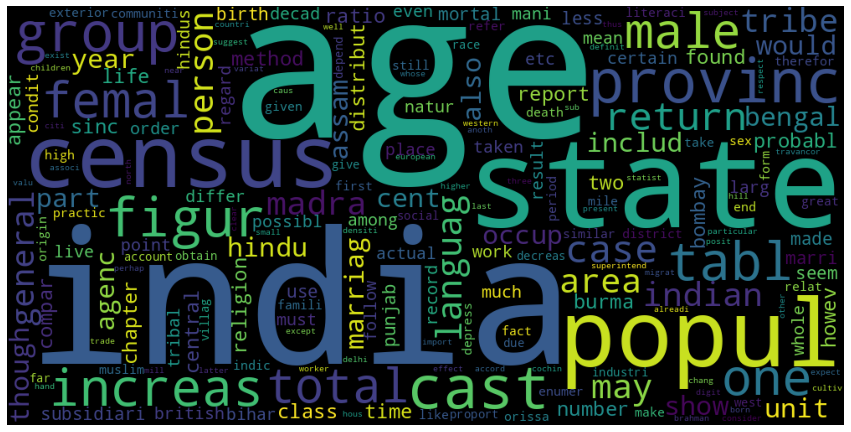

In [30]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(MyDict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Bar-graph

Sorting and getting the most frequently occurring elements

In [31]:
sortedDict = sorted(MyDict.items(), key=lambda x: x[1], reverse=True)
print(sortedDict[:10])

keyArr = [item[0] for item in sortedDict[:10]]
valArr = [item[1] for item in sortedDict[:10]]

[('age', 1591), ('india', 1251), ('state', 1229), ('popul', 1193), ('census', 1085), ('provinc', 978), ('cast', 947), ('group', 809), ('figur', 753), ('tabl', 719)]


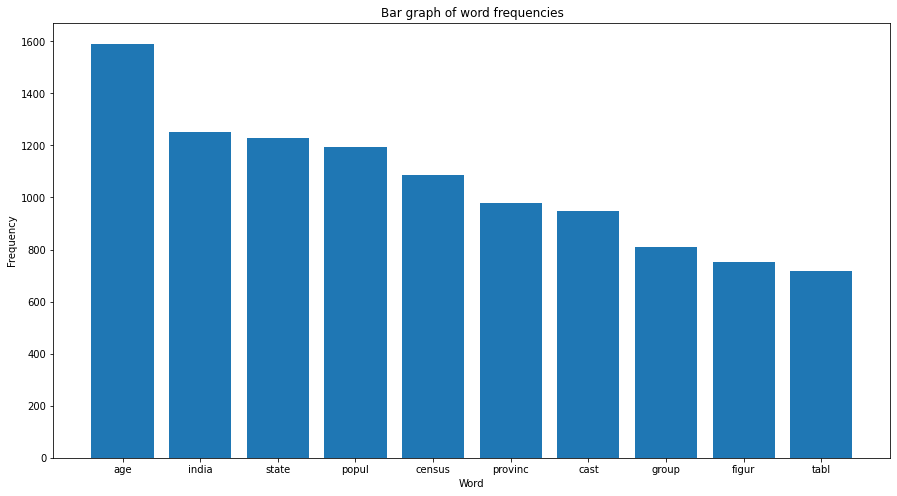

In [32]:
plt.figure(figsize=(15,8))

plt.bar(keyArr, valArr)

# set the x and y axis
plt.xlabel('Word')
plt.ylabel('Frequency')

# label for each bar
plt.title('Bar graph of word frequencies')

plt.show()